In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./bestsellers with categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
Name_grouped = data.groupby("Name").mean("User Rating")
Top_20_books = Name_grouped.sort_values(by=["User Rating","Reviews"],ascending=False)[:20]
# plt.bar(Top_10_books.index,Top_10_books["User Rating"])
# plt.xlabel("Genre")
# plt.ylabel("Average User Rating")
# plt.show()
Top_20_books

,User Rating,Reviews,Price,Year
Name,,,,
"Oh, the Places You'll Go!",4.9,21834.0,8.0,2015.5
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,19622.0,30.0,2016.0
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),4.9,19576.0,8.0,2013.5
The Very Hungry Caterpillar,4.9,19546.0,5.0,2016.0
"Brown Bear, Brown Bear, What Do You See?",4.9,14344.0,5.0,2018.0
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8),4.9,12619.0,8.0,2019.0
"Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)",4.9,11881.0,13.0,2018.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9,10052.0,22.0,2016.0
Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9,9413.0,8.0,2019.0


In [8]:
Genre_grouped = data.groupby("Genre").mean("User Rating")
Genre_grouped.head()

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.648333,15683.791667,10.850000,2013.925000
Non Fiction,4.595161,9065.145161,14.841935,2014.058065


Text(0, 0.5, 'Average User Rating')

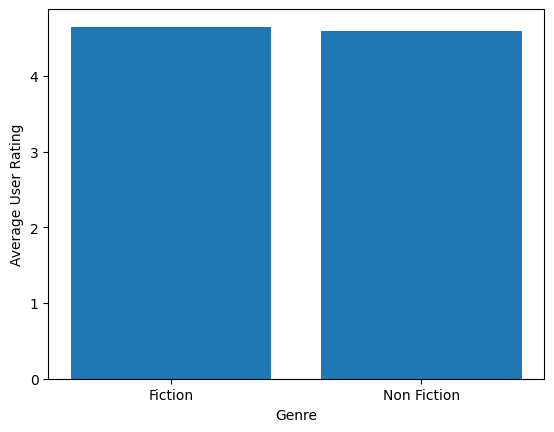

In [9]:
plt.bar(Genre_grouped.index,Genre_grouped["User Rating"])
plt.xlabel("Genre")
plt.ylabel("Average User Rating")

Text(0, 0.5, 'Average Price')

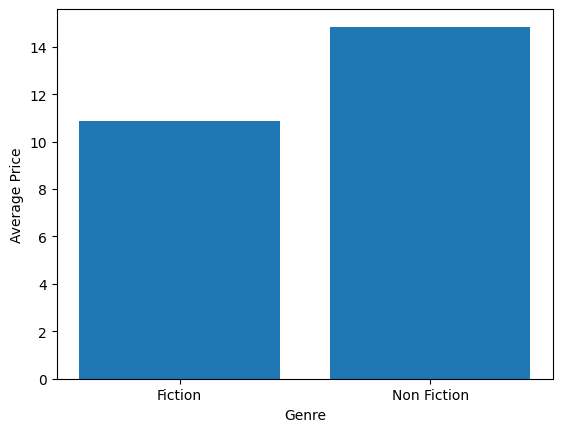

In [10]:
plt.bar(Genre_grouped.index,Genre_grouped["Price"])
plt.xlabel("Genre")
plt.ylabel("Average Price")

In [11]:
author_counts = data['Author'].value_counts()
author_w_multiple_books = data[data['Author'].isin(author_counts[author_counts > 4].index)]
author_w_multiple_books.Author.unique()

array(['Stephenie Meyer', 'Jeff Kinney', 'Suzanne Collins', 'Dav Pilkey',
       'J.K. Rowling', 'E L James', 'Roger Priddy', 'Giles Andreae',
       'Harper Lee', 'Dale Carnegie', 'Sarah Young', "Bill O'Reilly",
       'Rob Elliott', 'John Green', 'Dr. Seuss', 'Rick Riordan',
       'American Psychological Association', 'Gallup', 'John Grisham',
       'Gary Chapman', 'Stephen R. Covey', 'Patrick Lencioni',
       'Don Miguel Ruiz', 'Stieg Larsson', 'The College Board',
       'Eric Carle', 'Laura Hillenbrand', 'R. J. Palacio'], dtype=object)

In [12]:
author_w_most_books = author_counts.index[:3]

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

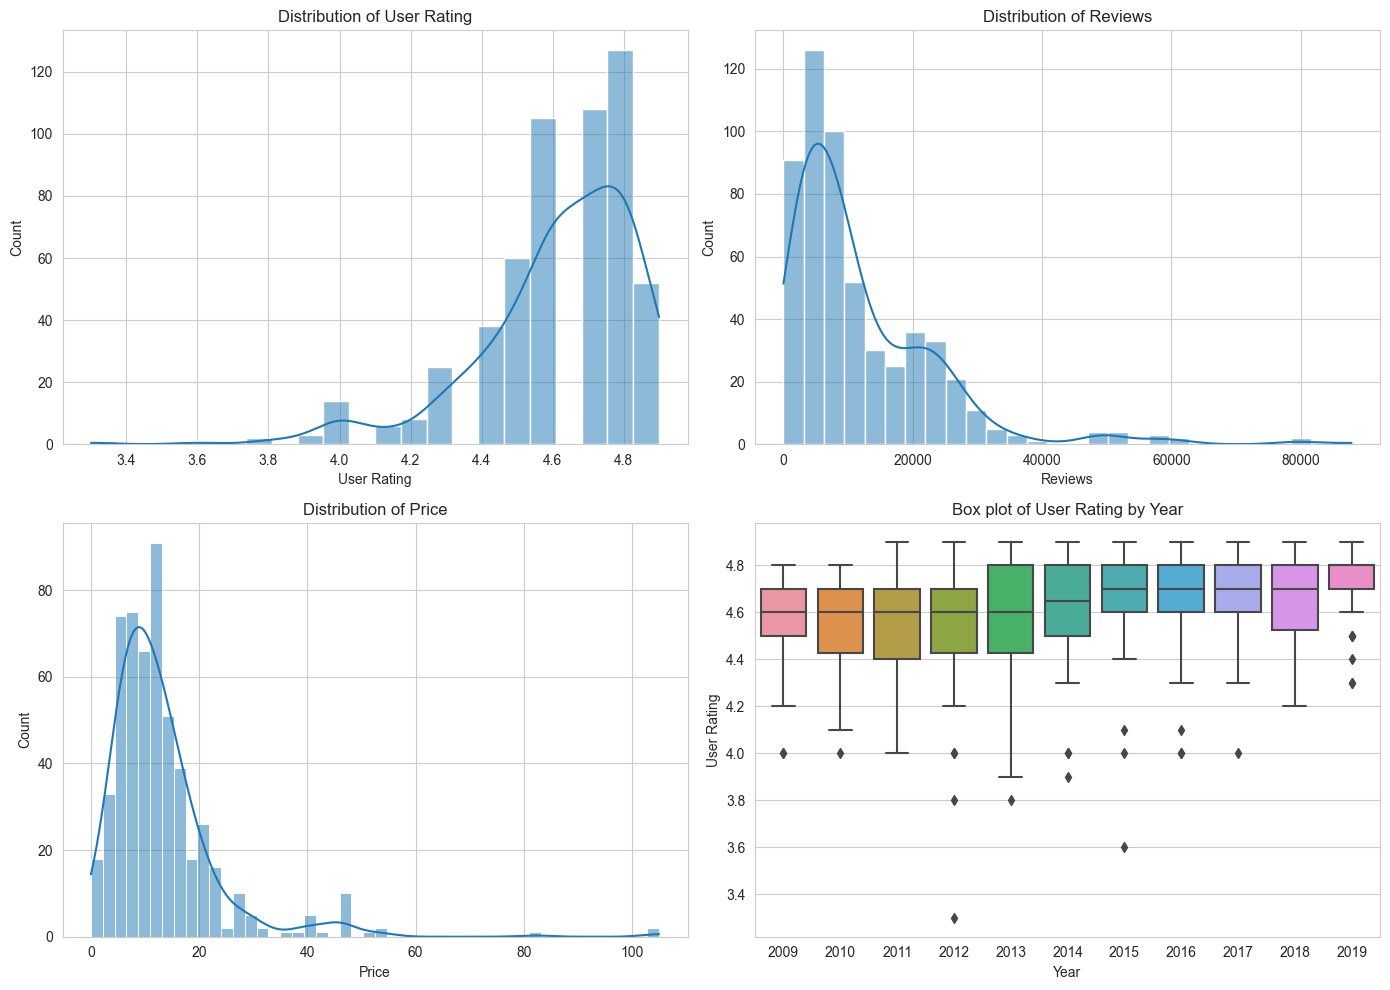

In [13]:
df =data.copy()

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(df['User Rating'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of User Rating')


sns.histplot(df['Reviews'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Reviews')


sns.histplot(df['Price'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Price')


sns.boxplot(data=df, x='Year', y='User Rating', ax=axes[1, 1])
axes[1, 1].set_title('Box plot of User Rating by Year')


plt.tight_layout()
plt.show()


In [14]:
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [23]:
df.groupby("Genre").mean("Price")


,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.648333,15683.791667,10.850000,2013.925000
Non Fiction,4.595161,9065.145161,14.841935,2014.058065


In [22]:
df.groupby("Genre").median("Price")

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.7,10922.0,9.0,2014.0
Non Fiction,4.6,6346.0,12.0,2014.0


In [ ]:
sns.boxplot(data=df, x='Genre', y='Price', ax=axes[0, 0])
axes[0, 0].set_title('Box plot of Price by Genre')

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

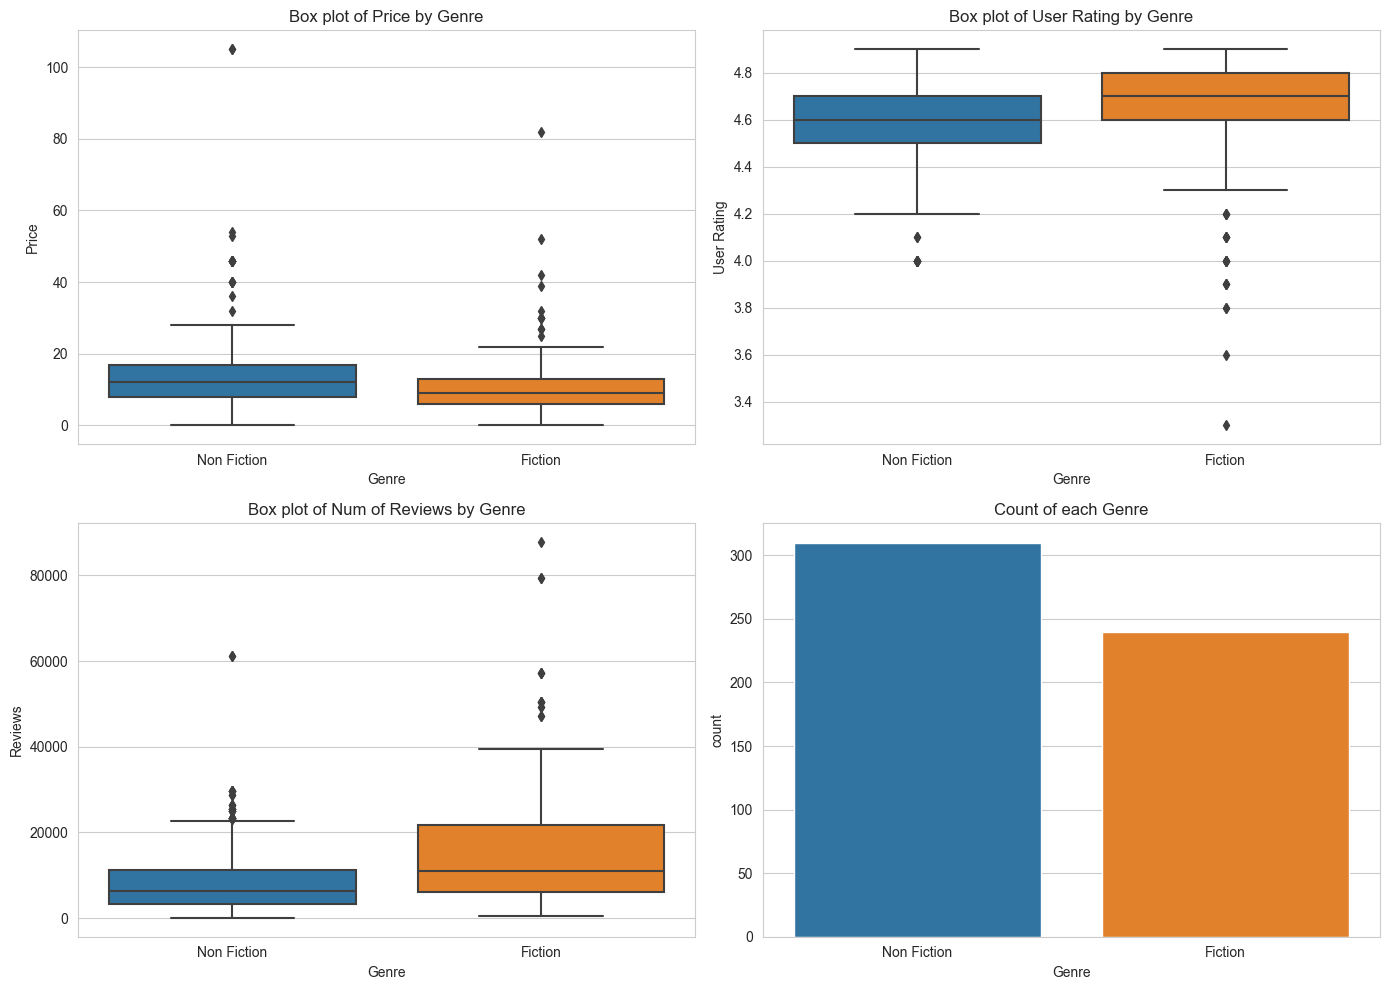

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))


sns.boxplot(data=df, x='Genre', y='Price', ax=axes[0, 0])
axes[0, 0].set_title('Box plot of Price by Genre')

sns.boxplot(data=df, x='Genre', y='User Rating', ax=axes[0, 1])
axes[0, 1].set_title('Box plot of User Rating by Genre')

sns.boxplot(data=df, x='Genre', y='Reviews', ax=axes[1, 0])
axes[1, 0].set_title('Box plot of Num of Reviews by Genre')

sns.countplot(data=df, x='Genre', ax=axes[1, 1])
axes[1, 1].set_title('Count of each Genre')

plt.tight_layout()
plt.show()

In [16]:
average_ratings = data.groupby('Year')['User Rating'].mean().reset_index()

c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

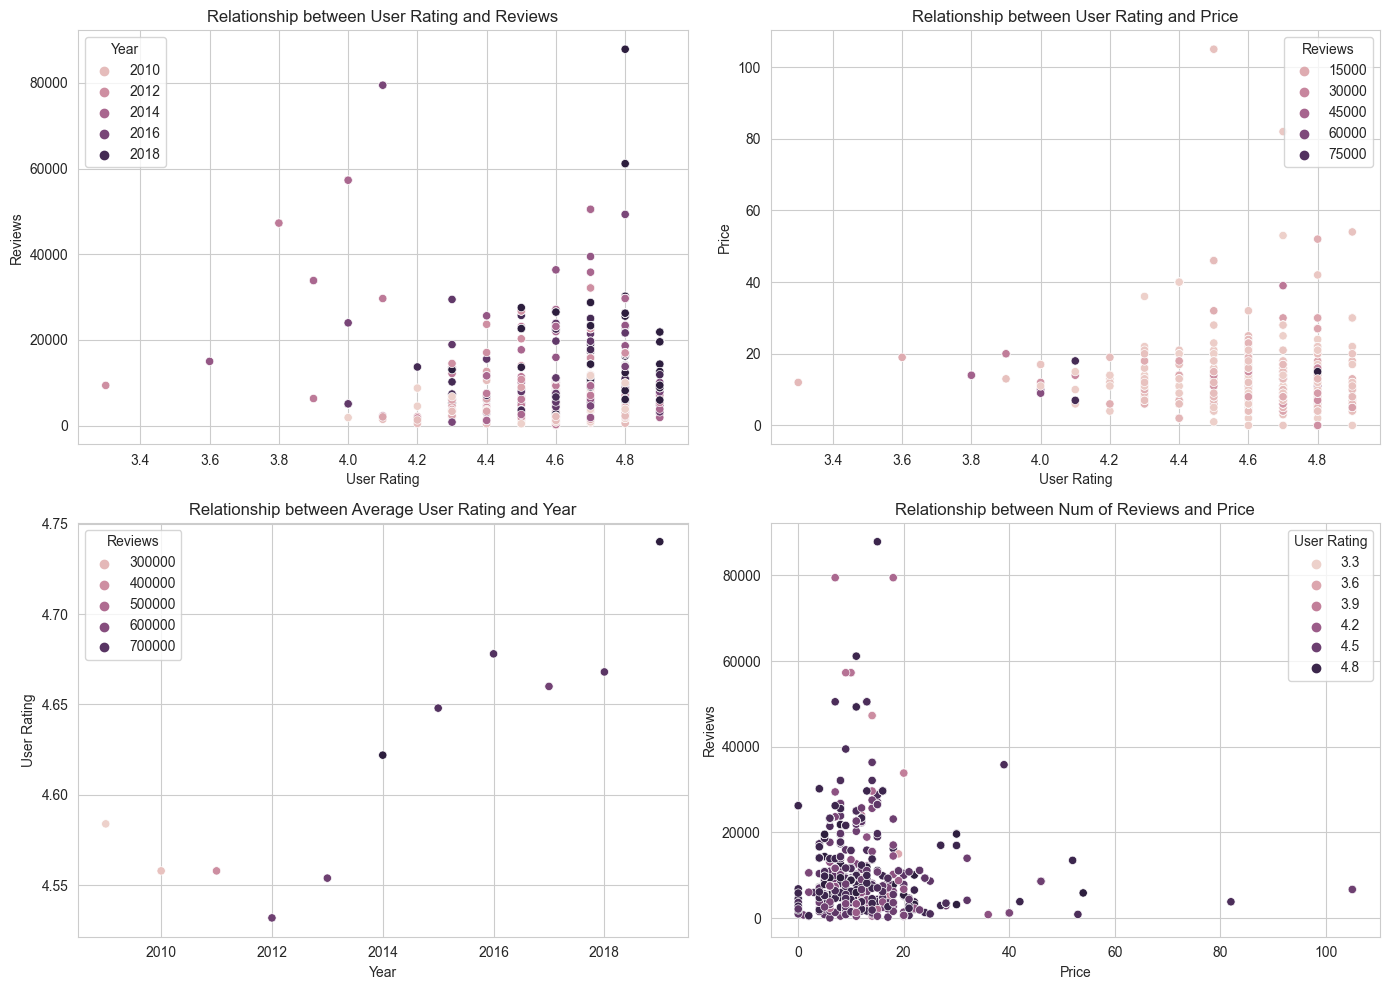

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.scatterplot(data=df, x='User Rating', y='Reviews',hue='Year', ax=axes[0, 0])
axes[0, 0].set_title('Relationship between User Rating and Reviews')

sns.scatterplot(data=df, x='User Rating', y='Price',hue='Reviews', ax=axes[0, 1])
axes[0, 1].set_title('Relationship between User Rating and Price')

total_reviews_per_year = data.groupby('Year')['Reviews'].sum().reset_index()
sns.scatterplot(data=average_ratings, x='Year', y='User Rating', hue=total_reviews_per_year['Reviews'], ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Average User Rating and Year')

sns.scatterplot(data=df, x='Price', y='Reviews',hue='User Rating', ax=axes[1, 1])
axes[1, 1].set_title('Relationship between Num of Reviews and Price')

plt.tight_layout()

plt.show()